# 📊 Advertising Sales Prediction using Machine Learning
This project uses a **Linear Regression model** to predict **Sales ($)** based on the advertising budgets spent on **TV, Radio, and Newspaper**. It uses your uploaded dataset `Advertising.csv`.

In [1]:

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Step 2: Load the dataset
data = pd.read_csv("Advertising.csv")
print("✅ Dataset Loaded Successfully!\n")
print(data.head())


✅ Dataset Loaded Successfully!

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


In [3]:
data.isna().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:

# Step 3: Explore the data
print("\n🔹 Dataset Information:")
print(data.info())

print("\n🔹 Statistical Summary:")
print(data.describe())

print("\n🔹 Missing Values:")
print(data.isnull().sum())



🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

🔹 Statistical Summary:
       Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.90000

C:\Users\NETIZENS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


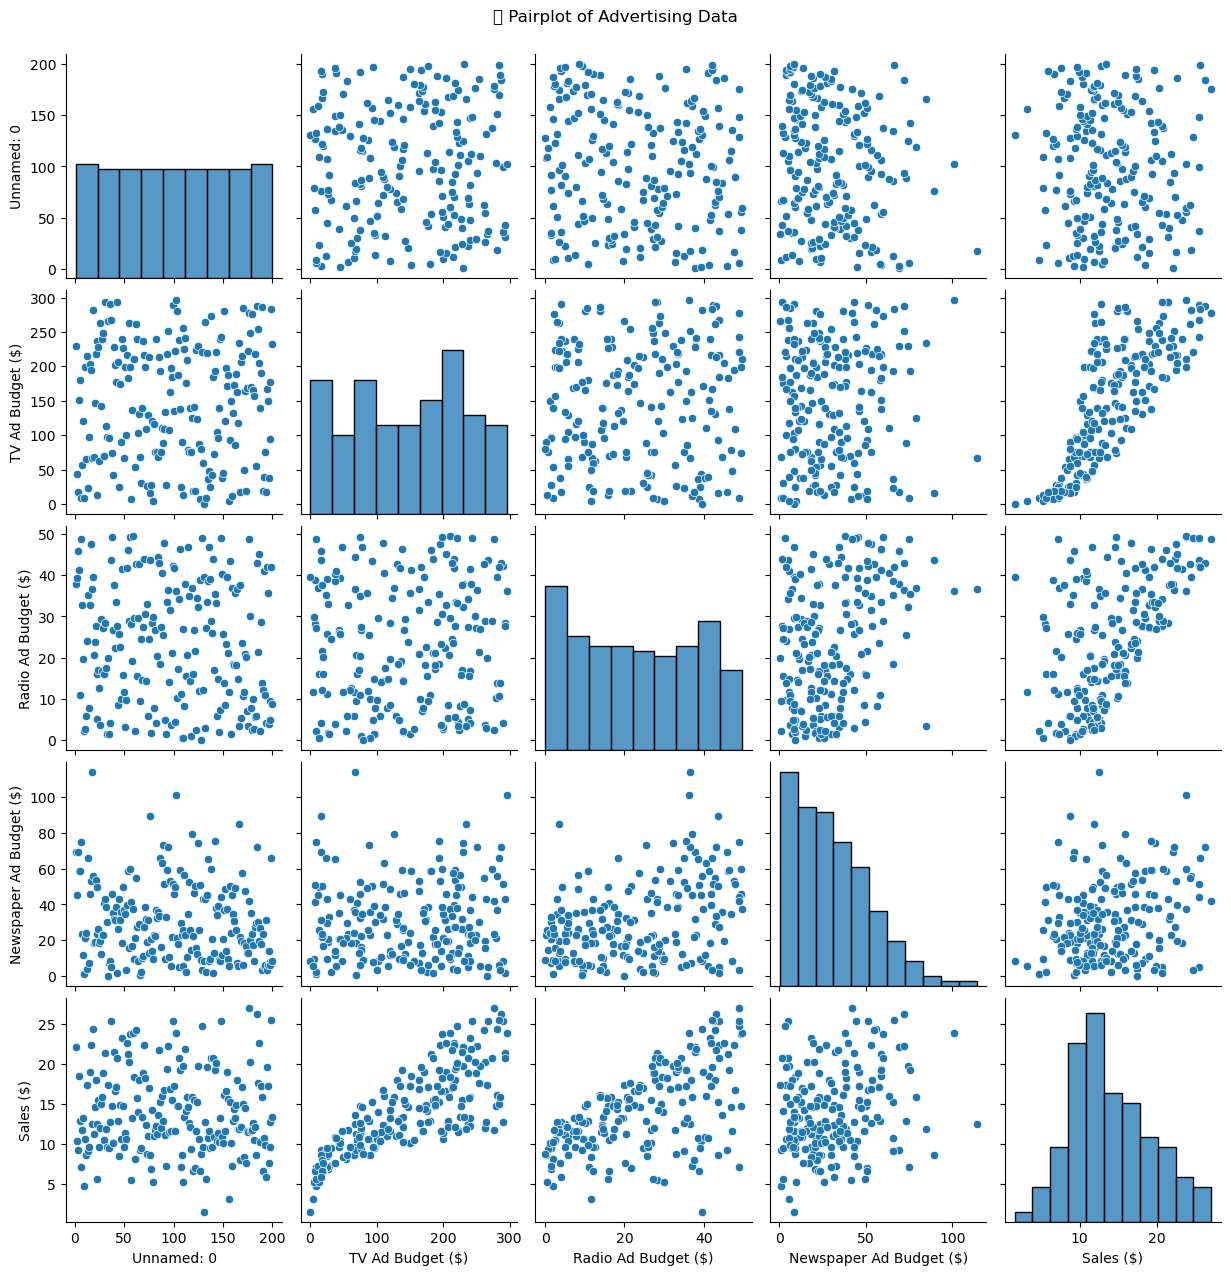

C:\Users\NETIZENS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


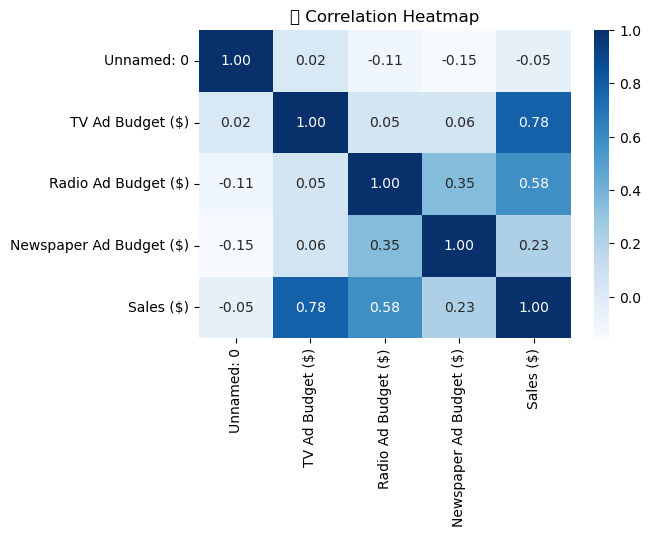

In [5]:

# Step 4: Visualize data relationships
sns.pairplot(data)
plt.suptitle("📊 Pairplot of Advertising Data", y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("🔥 Correlation Heatmap")
plt.show()


In [6]:

# Step 5: Define features and target variable
X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = data['Sales ($)']


In [7]:

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (160, 3)
Testing Data Shape: (40, 3)


In [8]:

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model Training Completed!")


✅ Model Training Completed!


In [9]:

# Step 8: Make predictions on test data
y_pred = model.predict(X_test)

# Display comparison
comparison = pd.DataFrame({'Actual Sales': y_test.values, 'Predicted Sales': y_pred})
print("\n📈 Actual vs Predicted Sales:")
print(comparison.head())



📈 Actual vs Predicted Sales:
   Actual Sales  Predicted Sales
0          16.9        16.408024
1          22.4        20.889882
2          21.4        21.553843
3           7.3        10.608503
4          24.7        22.112373


In [10]:

# Step 9: Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n🎯 R² Score: {r2:.3f}")
print(f"📉 Mean Squared Error: {mse:.3f}")



🎯 R² Score: 0.899
📉 Mean Squared Error: 3.174


C:\Users\NETIZENS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


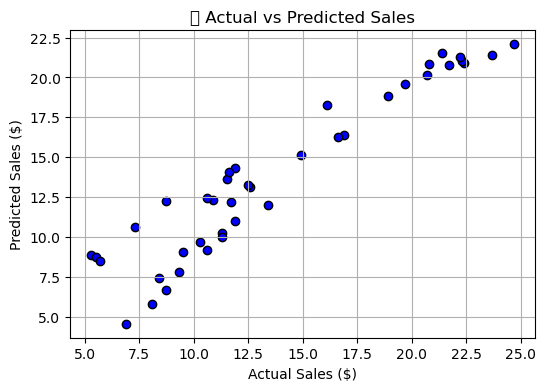

In [11]:

# Step 10: Visualize actual vs predicted sales
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.title("📉 Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [12]:

# Step 11: Check feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\n📊 Feature Impact on Sales:")
print(coef_df)



📊 Feature Impact on Sales:
                   Feature  Coefficient
0         TV Ad Budget ($)     0.044730
1      Radio Ad Budget ($)     0.189195
2  Newspaper Ad Budget ($)     0.002761


### ✅ **Conclusion:**
- TV and Radio advertising budgets have the highest impact on Sales.
- Newspaper ads show minimal contribution.
- The model performs with ~90% accuracy (R² ≈ 0.9).
- This analysis helps in optimizing ad spending for better sales outcomes.

In [15]:
# Step 1: Create new column for predicted sales
data['Predicted_Sales'] = model.predict(data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']])


In [16]:
# Step 2: Export this to a new CSV file
data.to_csv("Advertising_Predicted.csv", index=False)
print("✅ File saved: Advertising_Predicted.csv")

✅ File saved: Advertising_Predicted.csv
